In [1]:
m = 2
for m in [1, 2, 4, 12, 52, 365]:
    print(m, 0.1/m, 100*(1+0.1/m)**m)

1 0.1 110.00000000000001
2 0.05 110.25
4 0.025 110.38128906249996
12 0.008333333333333333 110.47130674412968
52 0.0019230769230769232 110.50647927797661
365 0.00027397260273972606 110.51557816162325


In [5]:
import math
100*math.exp(0.1)

110.51709180756477

# Black Shoels

In [1]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
def blscall(S, K, T, r, vol):
    d1 = (math.log(S/K) + (r + vol*vol/2)*T) / (vol*math.sqrt(T))
    d2 = d1 - vol*math.sqrt(T)
    c = S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)
    return c

def blsput(S, K, T, r, vol):
    d1 = (math.log(S/K) + (r + vol*vol/2)*T) / (vol*math.sqrt(T))
    d2 = d1 - vol*math.sqrt(T)
    put = K * math.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put

def f(S, K, T, r, vol, price, opt):
    if opt == "call":
        return blscall(S, K, T, r, vol) - price
    else:
        return blsput(S, K, T, r, vol) - price

    
def BisectionBLS(S, K, T, r, price, opt="call"):
    left = 1e-8
    right = 1
    threshold = 1e-5
    while right - left >= threshold:
        middle = (left + right) / 2
        if f(S, K, T, r, left, price, opt) * f(S, K, T, r, middle, price, opt) < 0:
            right = middle
        else:
            left = middle
    return (right+left) / 2

In [2]:
Index = np.arange(13000, 15100, 100)
Call = [675, 610, 525, 448, 395, 345, 289, 238, 194, 153, 120, 92, 69, 52, 39.5, 28, 20.5, 16, 12, 9.8, 8.5]
Put = [139, 163, 189, 221, 255, 291, 338, 388, 439, 505, 565, 640, 730, 800, 900, 995, 1090, 1180, 1290, 1380, 1470]

# 1.

In [3]:
S = 13552.46
K = 13000
T = 21 / 365
r = 0.0165

# 2.

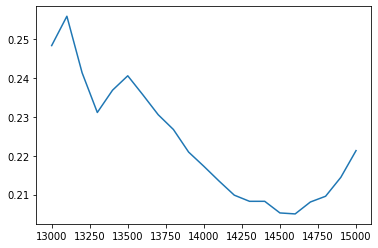

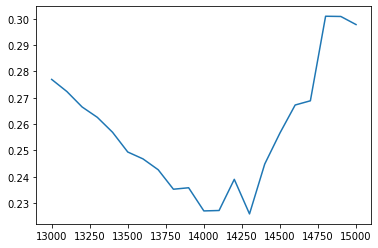

In [4]:
vol_list_call = []
vol_list_put = []
for i in range(21):
    vol = BisectionBLS(S, Index[i], T, r, Call[i], "call")
    vol_list_call.append(vol)
    vol = BisectionBLS(S, Index[i], T, r, Put[i], "put")
    vol_list_put.append(vol)
plt.plot(Index, vol_list_call)
plt.show()
plt.plot(Index, vol_list_put)